In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *

In [2]:
urls=search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1,
 'https://i.pinimg.com/originals/a5/c6/42/a5c64208796df8d2a75ea7ef032c2146.jpg')

In [3]:
dest=Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

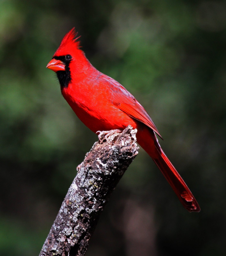

In [4]:
im=Image.open(dest)
im.to_thumb(256,256)

In [5]:
#key='AqItEIAmD87bFqNsCzE2MUk8WGIHpGtk5ik6RZVi0gpFEVYEAzkOZbVIqZMsbvaj'
searches='forest','bird'
path=Path('bird_or_not')
print(path)
if not path.exists():
    #path.mkdir() # fix from textbook
    for o in searches:
        dest=(path/o)
        print(dest)
        dest.mkdir(exist_ok=True, parents=True)
        #results=search_images_bing(key,f'{o} photo')
        #download_images(dest,urls=results.attrgot('content.url'))
        results=search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest, max_size=400, dest=dest)
        

bird_or_not
bird_or_not\forest
bird_or_not\bird


In [7]:
fns=get_image_files(path)
fns

(#350) [Path('bird_or_not/bird/004fe7dd-5bb8-4e28-baaa-310e0dcc48d2.jpg'),Path('bird_or_not/bird/00a35a3e-9bc3-48e3-a33b-65d5559f2def.jpg'),Path('bird_or_not/bird/0718ac22-b675-4365-a8ad-99ae1c53713a.jpg'),Path('bird_or_not/bird/08a2a926-a051-4c2a-8895-701f509d2551.jpg'),Path('bird_or_not/bird/0a4c1864-42f9-49f2-899b-eb30c1205546.jpg'),Path('bird_or_not/bird/0d9966f7-458e-43ef-9cd2-74ab3ce3bb02.jpg'),Path('bird_or_not/bird/0ef38c58-ca81-4d43-86a7-5dce826e7623.jpg'),Path('bird_or_not/bird/0f3ecc8a-ce70-4557-a6ae-803d62d548ad.jpg'),Path('bird_or_not/bird/12265a34-cee0-4766-9426-47bef5760c84.jpg'),Path('bird_or_not/bird/12dc8a3f-3907-4b34-9586-d70c2a04f8b6.jpg')...]

In [8]:
print(path)

bird_or_not


In [9]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)

(#3) [None,None,None]

c:\users\administrator\pycharmprojects\pythonproject\venv\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


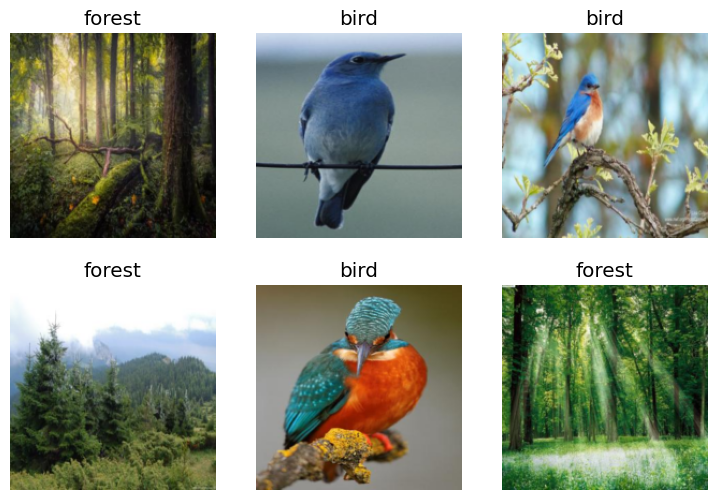

In [10]:
dls=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls,resnet18,metrics=error_rate)#renamed from old function cnn_learner
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.746466,0.488469,0.188406,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.067886,0.007406,0.000000,00:48
1,0.034578,0.000146,0.000000,00:47
2,0.023938,0.000116,0.000000,00:46


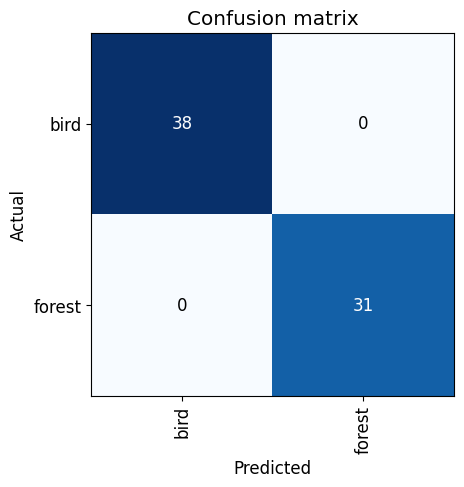

In [13]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability its a bird: {probs[0]:.4f}")

This is a: bird.
Probability its a bird: 1.0000


What else to do next!